# Project Introduction

***Project Overview***

*Project* ini membahas tentang penerapan *Supervised Machine Learning*, yaitu metode *Classification*. Algoritma model klasifikasi yang digunakan adalah Logistic Regression dan Support Vector Machine (SVM). Tujuan dari *project* ini adalah mengevaluasi dan menerapkan konsep Logistic Regression dan SVM untuk metode klasifikasi pada Machine Learning. Data yang digunakan dalam *project* ini adalah dataset yang berisi dokumentasi kondisi cuaca dan apakah hari itu turun hujan atau tidak di beberapa daerah di Australia selama 10 tahun. Dataset ini terdiri dari 145460 baris dan 23 kolom yang dapat diakses [di sini](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package). Kolom `RainTomorrow` akan menjadi target untuk prediksi ini. Jadi, objektif dari *project* ini adalah berdasarkan observasi atau dokumentasi kondisi cuaca pada hari itu, apakah besoknya akan turun hujan (Yes) atau tidak (No).

***Attribute Information***
1. `Date` - tanggal hari itu
2. `Location` - lokasi, nama kota di Australia
3. `MinTemp` - temperatur terendah hari itu dalam celcius
4. `MaxTemp` - temperatur tertinggi hari itu dalam celcius
5. `Rainfall` - jumlah curah hujan hari itu dalam mm
6. `Evaporation` - jumlah evaporasi dalam mm dari Class A pan selama 24 jam sebelum jam 9 pagi hari itu
7. `Sunshine` - jumlah jam hari itu cerah dengan cahaya matahari
8. `WindGustDir` - arah kecepatan angin yang paling tinggi selama 24 jam sebelum jam 12 malam hari itu
9. `WindGustSpeed` - kecepatan angin yang paling tinggi dalam km/jam selama 24 jam sebelum jam 12 malam hari itu
10. `WindDir9am` - arah angin jam 9 pagi
11. `WindDir3pm` - arah angin jam 3 sore
12. `WindSpeed9am` - kecepatan angin jam 9 pagi dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
13. `WindSpeed3pm` - kecepatan angin jam 3 sore dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
14. `Humidity9am` - humiditas jam 9 pagi dalam persen
15. `Humidity3pm` - humiditas jam 3 sore dalam persen
16. `Pressure9am` - tekanan udara jam 9 pagi dalam hpa
17. `Pressure3pm` - tekanan udara jam 3 sore dalam hpa
18. `Cloud9am` - persentase langit yang tertutup awan jam 9 pagi. dihitung dalam oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0, langit cerah, jika 8, langit sepenuhnya tertutup awan.
19. `Cloud3pm` - persentase langit yang tertutup awan jam 3 sore
20. `Temp9am` - temperatur jam 9 pagi dalam celcius
21. `Temp3pm` - temperatur jam 3 sore dalam celcius
22. `RainToday` - apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0
23. `RainTomorrow` - variable yang mau di prediksi

**Konsep Dasar Logistic Regression dan SVM**
1. Logistic Regression

Konsep yang digunakan dalam Logistic Regression hampir sama dengan Linear Regression, namun nilai *output* Logistic Regression berada di antara 0 dan 1 (Binary Logistic Regression). Saat menerapkan Logistic Regression dari beberapa variabel dependen $y$ pada kumpulan variabel independen $x = (x_1,...,x_r)$ dengan $r$ adalah jumlah prediktor, dimulai dengan nilai prediktor yang diketahui $x_i$ dan respon aktual yang sesuai $y_i$ untuk setiap observasi. Tujuannya adalah menemukan **logistic regression function** $p(x)$ sedemikian rupa sehingga *predicted response* $p(x_i)$ sedekat mungkin dengan *actual response* $y_i$. 

2. Support Vector Machine (SVM)

Cara kerja SVM adalah membangun *hyperplane* dalam multidimensional space untuk memisahkan kelas yang berbeda. SVM menghasilkan *hyperplane* optimal secara berulang, yang digunakan untuk meminimalkan kesalahan. Ide inti dari SVM adalah menemukan *Maximum Marginal Hyperplane* (MMH) yang paling baik membagi dataset menjadi beberapa kelas atau dalam kata lain, memisahkan kumpulan data yang diberikan dengan cara terbaik yaitu memilih *hyperplane* dengan kemungkinan margin maksimum antara *support vectors* dalam dataset yang diberikan. *Hyperplane* adalah *decision plane* yang memisahkan antara sekumpulan objek yang memiliki kelas yang berbeda, sedangkan Support Vector adalah *data points* yang paling dekat dengan *hyperplane*. Selain itu Margin adalah celah antara dua garis pada poin kelas tersebut.

**Sumber**

https://www.kode.id/courses/take/introduction-to-python-for-data-science-km/texts/25596520-classification-1

https://www.kode.id/courses/take/introduction-to-python-for-data-science-km/texts/25596524-classification-2

# Import Pustaka yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score
import pickle

# Data Loading

In [2]:
weather_data = pd.read_csv("./dataset/weatherAUS.csv")
pd.set_option("display.max_columns", 24)

In [3]:
df = weather_data.copy()

In [4]:
# 5 data pertama
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
# 5 data terakhir
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,ESE,17.0,17.0,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [6]:
# Memeriksa dimensi dari dataset (jumlah baris, jumlah kolom)
df.shape

(145460, 23)

In [7]:
# Ringkasan dataset (tipe masing-masing kolom pada data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Berdasarkan keterangan di atas, diketahui bahwa dataset ini terdiri dari 145460 baris dan 23 kolom. Terdapat 16 kolom yang memiliki tipe *float* dan 7 kolom dengan tipe *object*.

# Data Cleaning

Bagian ini berisi proses penyiapan data berupa *data cleaning* sebelum dilakukan eksplorasi data lebih lanjut. Proses ini bertujuan untuk melihat apakah dalam data terdapat nilai yang hilang atau *missing values*, nilai yang tidak signifikan satu sama lain, dan melihat apakah ada duplikasi dalam keseluruhan data.

In [8]:
# Memeriksa apakah ada duplikasi dalam data
df.duplicated().sum()

0

In [9]:
# Membuat dataframe jumlah missing values dan persentasenya
nan_sum = df.isnull().sum()
nan_sum_percentage = np.asarray((nan_sum/len(df))*100)
nan_sum = pd.DataFrame(nan_sum)
nan_sum.rename(columns={0:"nan_sum"}, inplace=True)
nan_sum["percentage"] = nan_sum_percentage

nan_sum

,nan_sum,percentage
Date,0,0.000000
Location,0,0.000000
MinTemp,1485,1.020899
MaxTemp,1261,0.866905
Rainfall,3261,2.241853
Evaporation,62790,43.166506
Sunshine,69835,48.009762
WindGustDir,10326,7.098859
WindGustSpeed,10263,7.055548
WindDir9am,10566,7.263853


Berdasarkan keterangan di atas, dapat diketahui bahwa tidak ada duplikasi dalam data. Namun terdapat banyak jumlah *missing values*, terutama pada kolom `Evaporation`,`Sunshine`,`Cloud9am`, dan `Cloud3pm` yang memiliki >30% *missing values*. Berikut adalah visualisasi *missing values* pada keseluruhan dataset:

In [10]:
msno.matrix(df)

<AxesSubplot:>

Untuk mengatasi *missing values* pada setiap kolom numerik, akan digunakan teknik **Moving Average**. Teknik ini digunakan karena dataset adalah data deret waktu, serta berdasarkan waktu dan tempat juga diduga memiliki perbedaan nilai kondisi cuaca tertentu. Misal nilai `WindGustSpeed` atau kecepatan angin pada Februari 2010 dan September 2012 di Albury dan Uluru berbeda. Berdasarkan asumsi ini, tidak tepat jika *missing values* hanya diisi dengan satu nilai, maka dari itu akan digunakan teknik MA untuk mengisi kolom yang mengandung *missing values*.

In [11]:
# Memisahkan kolom kategorik dan numerik
categorical = [cols for cols in df.columns if df[cols].dtypes=='object']
numerical = [cols for cols in df.columns if df[cols].dtypes=='float64']

In [12]:
# Mengisi missing values setiap kolom dengan moving average (rolling)
for cols in numerical:
    if df[cols].isnull().sum() != 0:
        while True:
            df[cols] = df[cols].fillna(df[cols].rolling(min_periods = 1, window = 7, center=True).mean())
            if df[cols].isnull().sum() == 0:
                    break

In [13]:
# Memeriksa kembali apakah masih terdapat missing values
nan_sum = df.isnull().sum()
nan_sum_percentage = np.asarray((nan_sum/len(df))*100)
nan_sum = pd.DataFrame(nan_sum)
nan_sum.rename(columns={0:"nan_sum"}, inplace=True)
nan_sum["percentage"] = nan_sum_percentage

nan_sum

,nan_sum,percentage
Date,0,0.000000
Location,0,0.000000
MinTemp,0,0.000000
MaxTemp,0,0.000000
Rainfall,0,0.000000
Evaporation,0,0.000000
Sunshine,0,0.000000
WindGustDir,10326,7.098859
WindGustSpeed,0,0.000000
WindDir9am,10566,7.263853


*Missing values* pada kolom numerik sudah teratasi. Selanjutnya, untuk *missing values* pada kolom kategorik terutama pada kolom `RainToday` dan `RainTomorrow` akan didrop atau dihilangkan dari dataset karena hanya mengandung 2% *missing values*, yang mana ini tidak akan memberikan pengaruh yang signifikan pada analisis data. Di sisi lain, kolom `RainTomorrow` merupakan kolom target, sehingga rentan menyebabkan bias dalam prediksi nantinya.

In [14]:
# Menghilangkan missing values pada kolom RainToday dan RainTomorrow
df.dropna(subset=['RainToday','RainTomorrow'], axis=0, inplace=True)

Selanjutnya untuk *missing values* pada kolom kategorik lain, karena mengandung <10% *missing values*, maka *missing values* pada kolom tersebut juga akan didrop atau dihilangkan dari dataset.

In [15]:
# Menghilangkan missing values pada kolom kategorik lain karena mengandung <10% missing values
df.dropna(subset=['WindGustDir','WindDir9am','WindDir3pm'], axis=0, inplace=True)

In [16]:
# Memeriksa kembali apakah masih terdapat missing values
nan_sum = df.isnull().sum()
nan_sum_percentage = np.asarray((nan_sum/len(df))*100)
nan_sum = pd.DataFrame(nan_sum)
nan_sum.rename(columns={0:"nan_sum"}, inplace=True)
nan_sum["percentage"] = nan_sum_percentage

nan_sum

,nan_sum,percentage
Date,0,0.0
Location,0,0.0
MinTemp,0,0.0
MaxTemp,0,0.0
Rainfall,0,0.0
Evaporation,0,0.0
Sunshine,0,0.0
WindGustDir,0,0.0
WindGustSpeed,0,0.0
WindDir9am,0,0.0


*Missing values* sudah teratasi. Selanjutnya, kolom `RainToday` dan `RainTomorrow` akan diubah menjadi kolom numerik, yaitu dengan mengganti nilai "Yes" dengan angka 1 dan "No" dengan angka 0. Selain itu, format kolom `Date` akan diubah menjadi format datetime dan akan dibuat kolom bulan dan tahun.

In [17]:
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})

In [18]:
# Mengubah format kolom Date menjadi datetime
df["Date"] = pd.to_datetime(df["Date"]) # to_datetime converts to type date
# Membuat kolom baru 
df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month
df["day"] = df["Date"].dt.day

In [19]:
# Memeriksa kembali ringkasan dataset (tipe masing-masing kolom pada data dan jumlah baris/kolom)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123710 entries, 0 to 145458
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           123710 non-null  datetime64[ns]
 1   Location       123710 non-null  object        
 2   MinTemp        123710 non-null  float64       
 3   MaxTemp        123710 non-null  float64       
 4   Rainfall       123710 non-null  float64       
 5   Evaporation    123710 non-null  float64       
 6   Sunshine       123710 non-null  float64       
 7   WindGustDir    123710 non-null  object        
 8   WindGustSpeed  123710 non-null  float64       
 9   WindDir9am     123710 non-null  object        
 10  WindDir3pm     123710 non-null  object        
 11  WindSpeed9am   123710 non-null  float64       
 12  WindSpeed3pm   123710 non-null  float64       
 13  Humidity9am    123710 non-null  float64       
 14  Humidity3pm    123710 non-null  float64       
 15  

Setelah dilakukannya *data cleaning*, jumlah observasi yang tersisa pada data adalah 123710 baris dan 23 kolom.

# Eksplorasi Data

Selanjutnya eksplorasi data dilakukan untuk memahami data lebih dalam, mengetahui variabel atau fitur apa saja yang diduga berpengaruh dalam prediksi variabel targetnya, dan memeriksa statistik deskriptif serta distribusinya untuk kepentingan prediksi model.

In [20]:
pd.set_option("display.max_columns", 26)

In [21]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,2008-12-01,Albury,13.4,22.9,0.6,12.0,12.3,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,2.0,16.9,21.8,0,0,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,12.0,12.3,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,7.500000,5.0,17.2,24.3,0,0,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,12.0,12.3,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,7.500000,2.0,21.0,23.2,0,0,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,12.0,12.3,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,5.333333,5.0,18.1,26.5,0,0,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,12.0,12.3,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.0,17.8,29.7,0,0,2008,12,5


## Frekuensi nilai pada kolom `RainTomorrow`

In [22]:
df['RainTomorrow'].value_counts()

0    96318
1    27392
Name: RainTomorrow, dtype: int64

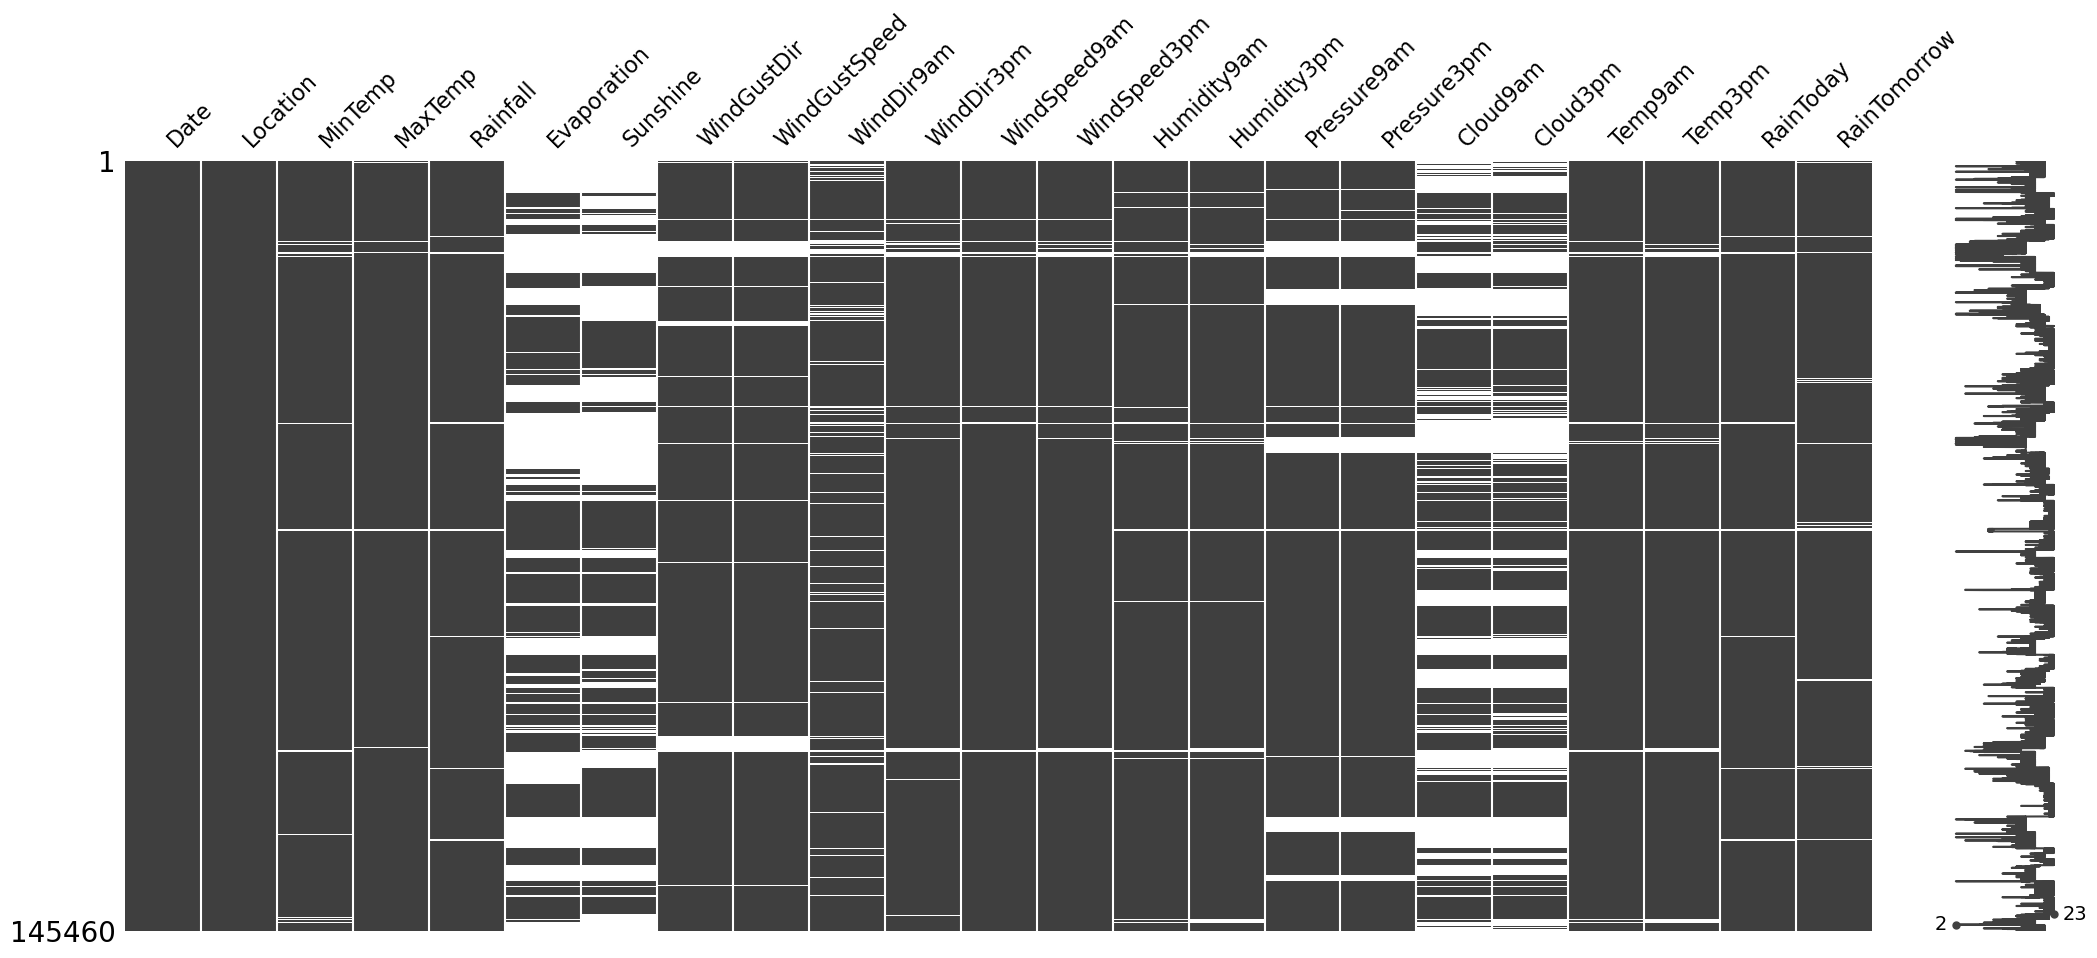

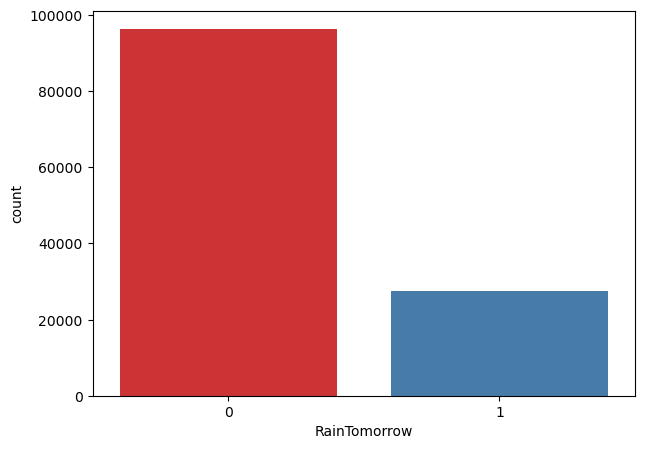

In [23]:
f, ax = plt.subplots(figsize=(7, 5))
ax = sns.countplot(x="RainTomorrow", data=df, palette="Set1")
plt.show()

Berdasarkan plot di atas, diketahui bahwa nilai 0 lebih banyak daripada nilai 1. Artinya pada dataset, jumlah hari yang tidak turun hujan berdasarkan catatan kondisi cuaca lebih banyak dibanding jumlah hari yang turun hujan. 

## Statistik deskriptif dan distribusi masing-masing kolom numerik

In [24]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
count,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000
mean,12.416221,23.477178,2.375661,6.628942,7.933348,40.685280,15.011689,19.174578,67.659055,50.766630,1017.229620,1014.861545,4.588274,4.573165,17.249601,21.930129,0.224363,0.221421,2012.806111,6.431824,15.709781
std,6.369379,7.208264,8.528039,6.305315,3.770014,13.388636,8.307285,8.571039,19.165018,20.980978,7.068359,7.019367,2.788990,2.634515,6.501097,7.041993,0.417164,0.415205,2.528473,3.475113,8.788908
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000,2007.000000,1.000000,1.000000
25%,7.800000,18.100000,0.000000,2.800000,5.400000,31.000000,9.000000,13.000000,56.000000,35.000000,1012.600000,1010.100000,2.000000,2.000000,12.500000,16.700000,0.000000,0.000000,2011.000000,3.000000,8.000000
50%,12.200000,23.000000,0.000000,5.400000,8.400000,39.000000,13.000000,19.000000,69.000000,51.000000,1017.100000,1014.800000,5.000000,5.000000,16.900000,21.500000,0.000000,0.000000,2013.000000,6.000000,16.000000
75%,17.100000,28.600000,0.800000,8.400000,11.200000,48.000000,20.000000,24.000000,82.000000,65.000000,1021.900000,1019.600000,7.000000,7.000000,21.900000,26.900000,0.000000,0.000000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,367.600000,86.200000,14.500000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000,1.000000,2017.000000,12.000000,31.000000


Memeriksa distribusi data menggunakan Histogram.

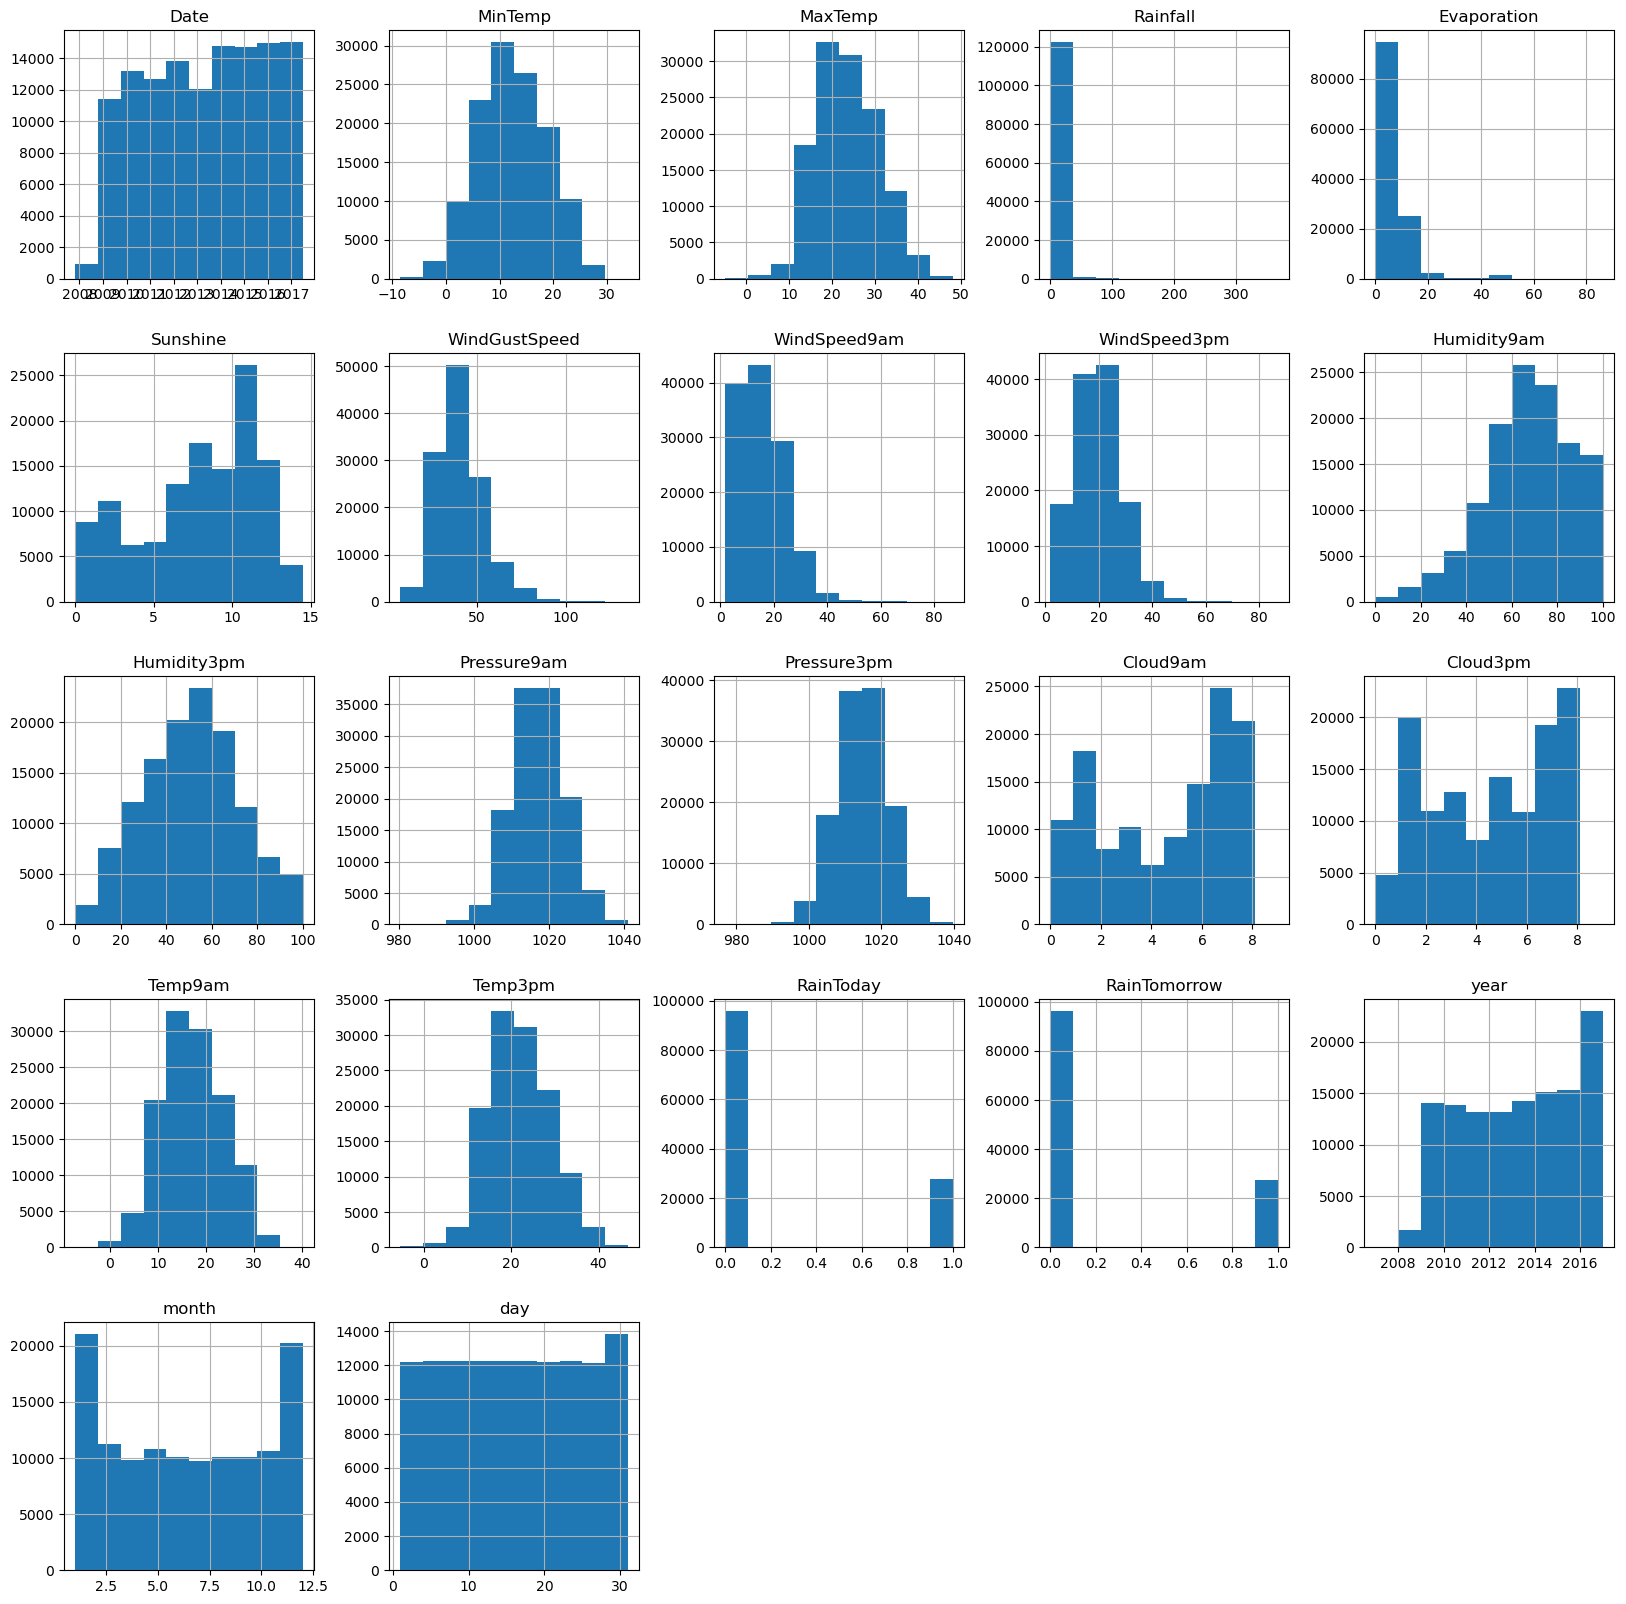

In [25]:
df.hist(figsize=(20, 20))
plt.show()

Berdasarkan plot histogram di atas, dapat diketahui bahwa:
1. Kolom `MinTemp` dan `MaxTemp` memiliki distribusi yang sama.
2. Kolom `Rainfall` dan `Evaporation` memiliki *outlier*. Jika dilihat dari nilai mediannya dan rata-ratanya, kedua kolom ini memiliki nilai median dan rata-rata tidak lebih dari 10 mm. Artinya, rata-rata jumlah curah hujan dan jumlah evaporasi di Australia selama 10 tahun tidak lebih dari 10 mm.
3. Kolom `WindGustSpeed`, `WindGust9am`, dan `WindGust3pm` memiliki distribusi yang mirip. Tetapi jika dilihat dari frekuensinya, kolom `WindGust3pm` memiliki nilai rata-rata lebih besar dibanding dengan kolom `WindGust9am`, artinya kecepatan angin pada waktu sore cenderung lebih tinggi.
4. Kolom `Humidity9am` dan `Humidity3pm` juga memiliki distribusi yang mirip. Tetapi kolom `Humidity9am` memiliki nilai rata-rata lebih besar dibanding `Humidity3pm`. Artinya, persentase humiditas pada waktu pagi lebih tinggi dibanding dengan waktu sore.
5. Kolom `Pressure9am` dan `Pressure3pm` memiliki distribusi yang mirip, serta nilai rata-rata dan median yang tidak berbeda jauh. Sehingga, dapat diartikan bahwa tekanan udara pada saat pagi maupun sore tidak terjadi perubahan yang signifikan.
6. Sama seperti `Pressure9am` dan `Pressure3pm`, kolom `Cloud9am` dengan `Cloud3pm` serta kolom `Temp9am` dan `Temp3pm` memiliki distribusi yang mirip. Dapat diartikan bahwa persentase langit yang tertutup awan pada waktu pagi dan sore tidak mengalami perubahan yang signifikan, namun untuk temperatur, berdasarkan nilai rata-ratanya temperatur pada sore hari cenderung lebih tinggi dibanding pada pagi hari.

In [26]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,2008-12-01,Albury,13.4,22.9,0.6,12.0,12.3,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,2.0,16.9,21.8,0,0,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,12.0,12.3,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,7.500000,5.0,17.2,24.3,0,0,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,12.0,12.3,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,7.500000,2.0,21.0,23.2,0,0,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,12.0,12.3,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,5.333333,5.0,18.1,26.5,0,0,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,12.0,12.3,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.0,17.8,29.7,0,0,2008,12,5


## Distribusi lokasi berdasarkan terjadinya hujan atau tidak

Berdasarkan visualisasi ini, dapat diketahui apakah perbedaan lokasi atau daerah mempengaruhi turunnya hujan atau tidak.

In [27]:
df_rain_by_loc = df.groupby(by='Location').sum()
df_rain_by_loc = df_rain_by_loc[['RainToday']]
df_rain_by_loc.head()

,RainToday
Location,
Adelaide,635
Albury,558
AliceSprings,231
BadgerysCreek,524
Ballarat,750


In [28]:
plt.figure(figsize=(8, 12))
sns.barplot(x='RainToday', 
            y=df_rain_by_loc.index, 
            data=df_rain_by_loc.sort_values('RainToday', ascending=False), 
            orient='h',
            palette='crest'
           )
plt.xlabel('Jumlah Hari Terjadinya Hujan')
plt.title('Jumlah Hari Terjadinya Hujan Berdasarkan Lokasi')
plt.tight_layout()

Berdasarkan plot di atas, diketahui bahwa lokasi yang berbeda juga menunjukkan jumlah hari turunnya hujan berbeda pula. Oleh karena itu, diasumsikan bahwa lokasi mempengaruhi prediksi turunnya hujan.

## Pola turunnya hujan berdasarkan waktu turunnya hujan perbulan

Berdasarkan visualisasi ini, akan diketahui apakah bulan mempengaruhi turunnya hujan. Dalam kata lain, apakah turunnya hujan di Australia terjadi secara musiman.

In [29]:
df_seasonality = df.copy()
df_seasonality.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,2008-12-01,Albury,13.4,22.9,0.6,12.0,12.3,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,2.0,16.9,21.8,0,0,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,12.0,12.3,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,7.500000,5.0,17.2,24.3,0,0,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,12.0,12.3,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,7.500000,2.0,21.0,23.2,0,0,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,12.0,12.3,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,5.333333,5.0,18.1,26.5,0,0,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,12.0,12.3,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.0,17.8,29.7,0,0,2008,12,5


In [30]:
df_seasonality_grouped = df_seasonality.groupby('month').sum()
df_seasonality_grouped = df_seasonality_grouped[['RainToday']]

In [31]:
plt.figure(figsize=(9,5))
sns.lineplot(data=df_seasonality_grouped, x=df_seasonality_grouped.index, y='RainToday')
plt.title('Total Hari Setiap Bulan Selama 10 Tahun')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Hari Turunnya Hujan')
plt.grid(linewidth=0.5)
plt.tight_layout()

Berdasarkan plot di atas, dapat diketahui secara grafis bahwa turunnya hujan terjadi secara musiman, yakni intensitas turunnya hujan tertinggi di bulan 6 atau bulan Juni dan menurun di bulan 8 atau bulan Agustus. Selain itu, intensitas turunnya hujan paling rendah berada di bulan 2 atau bulan Februari. Dapat diasumsikan juga bahwa bulan mempengaruhi prediksi turunnya hujan.

## Intensitas turunnya hujan berdasarkan arah mata angin

Eksplorasi ini dilakukan untuk melihat apakah kolom `WindGustDir`, `WindDir9am`, dan `WindDir3pm` berpengaruh terhadap `RainTomorrow`.

In [32]:
df_categorical = df[['RainTomorrow','WindGustDir','WindDir9am','WindDir3pm']]
df_categorical = df_categorical[df_categorical['RainTomorrow']==1]
df_categorical.head()

,RainTomorrow,WindGustDir,WindDir9am,WindDir3pm
8,1,NNW,SE,NW
10,1,N,SSE,ESE
11,1,NNE,NE,ENE
12,1,W,NNW,NNW
16,1,ENE,SSW,E


/home/katapang/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/katapang/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/katapang/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


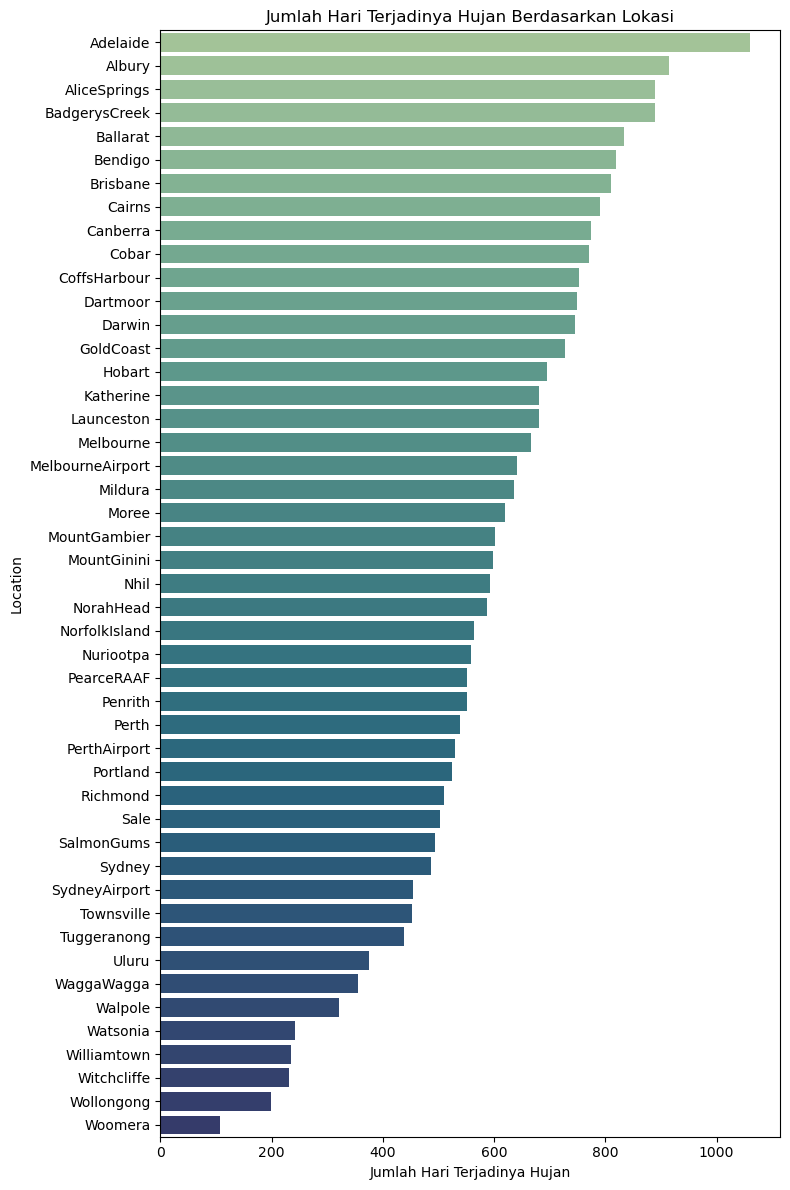

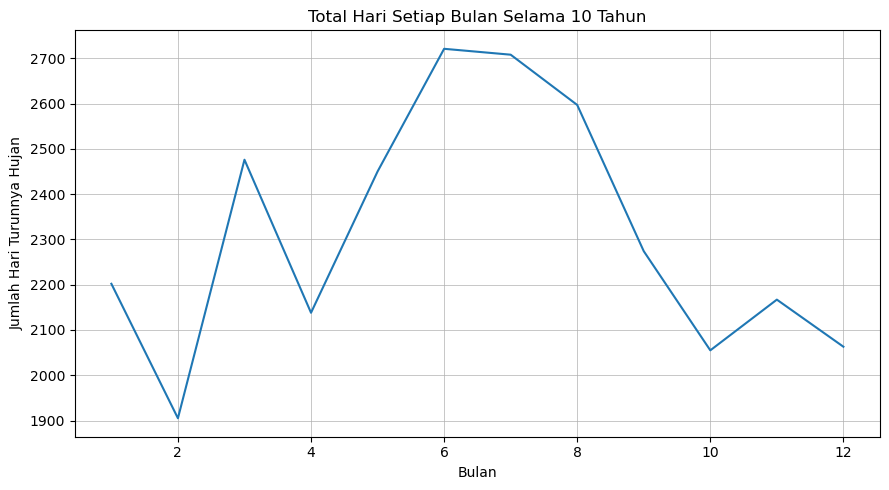

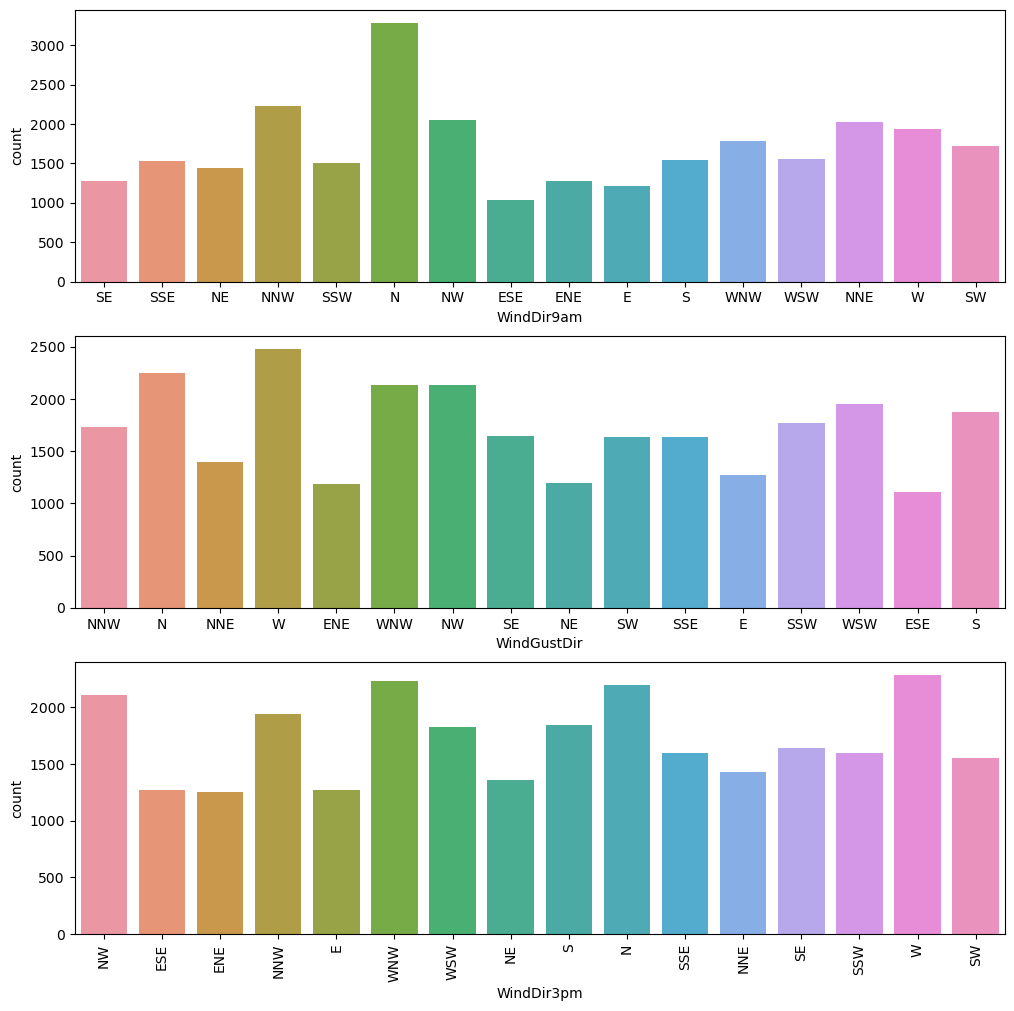

In [33]:
categoricalPlot = ['WindDir9am','WindGustDir', 'WindDir3pm']
fig, ax = plt.subplots(3, 1, figsize=(12,12))
c=0
while c<=2:
    sns.countplot(df_categorical[categoricalPlot[c]], ax=ax[c])
    plt.xticks(rotation=90)
    c+=1
plt.show()

Berdasarkan plot di atas, secara grafis diketahui bahwa ketiga kolom arah angin tidak menunjukkan pengaruh yang signifikan terhadap intensitas turunnya hujan. Hal ini ditunjukkan oleh beberapa arah mata angin yang memiliki intensitas atau jumlah hari turunnya hujan dengan jumlah yang sama.

## Distribusi kolom numerik berdasarkan kolom target

In [34]:
cols = ['MinTemp','MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am','WindSpeed3pm',
       'Humidity9am', 'Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']

fig, ax = plt.subplots(4, 4, figsize=(12,18))
ax = ax.reshape(-1)

for i, col in enumerate(cols):
    sns.histplot(data=df, x=col, hue='RainTomorrow', multiple='stack', ax=ax[i])

fig.tight_layout(pad=2.0)
plt.title('Histogram Kolom Numerik')

Text(0.5, 1.0, 'Histogram Kolom Numerik')

Berdasarkan plot di atas, dapat diketahui bahwa:

1. Kolom `MinTemp` dan `MaxTemp` menunjukkan bahwa semakin rendah temperatur, maka kemungkinan hujan akan turun semakin besar. Hal ini ditunjukkan oleh tingginya frekuensi temperatur pada nilai yang rendah. Selain itu, asumsi ini juga didukung oleh distribusi frekuensi pada kolom `Temp9am` dan `Temp3pm`.
2. Kolom `Evaporation`, `Sunshine`, `WindGustSpeed`, `WindSpeed9am`, dan `WindSpeed3pm` cenderung tidak menunjukkan adanya pengaruh signifikan terhadap kolom `RainTomorrow`.
3. Kolom `Humidity9am` dan `Humidity3pm` menunjukkan pengaruh yang cukup signifikan terhadap kolom `RainTomorrow`. Hal ini ditunjukkan oleh semakin tingginya frekuensi nilai humiditas, maka frekuensi turunnya hujan juga tinggi.
4. Kolom `Pressure9am` dan `Pressure3pm` cenderung tidak menunjukkan pengaruh yang signifikan terhadap kolom `RainTomorrow`.
5. Kolom `Cloud9am` dan `Cloud3pm` cenderung menunjukkan pengaruh yang cukup signifikan terhadap kolom `RainTomorrow`. Hal ini ditunjukkan oleh semakin tingginya frekuensi nilai persentase langit yang tertutup awan, maka frekuensi turunnya hujan juga tinggi.

## Korelasi kolom numerik dengan kolom target

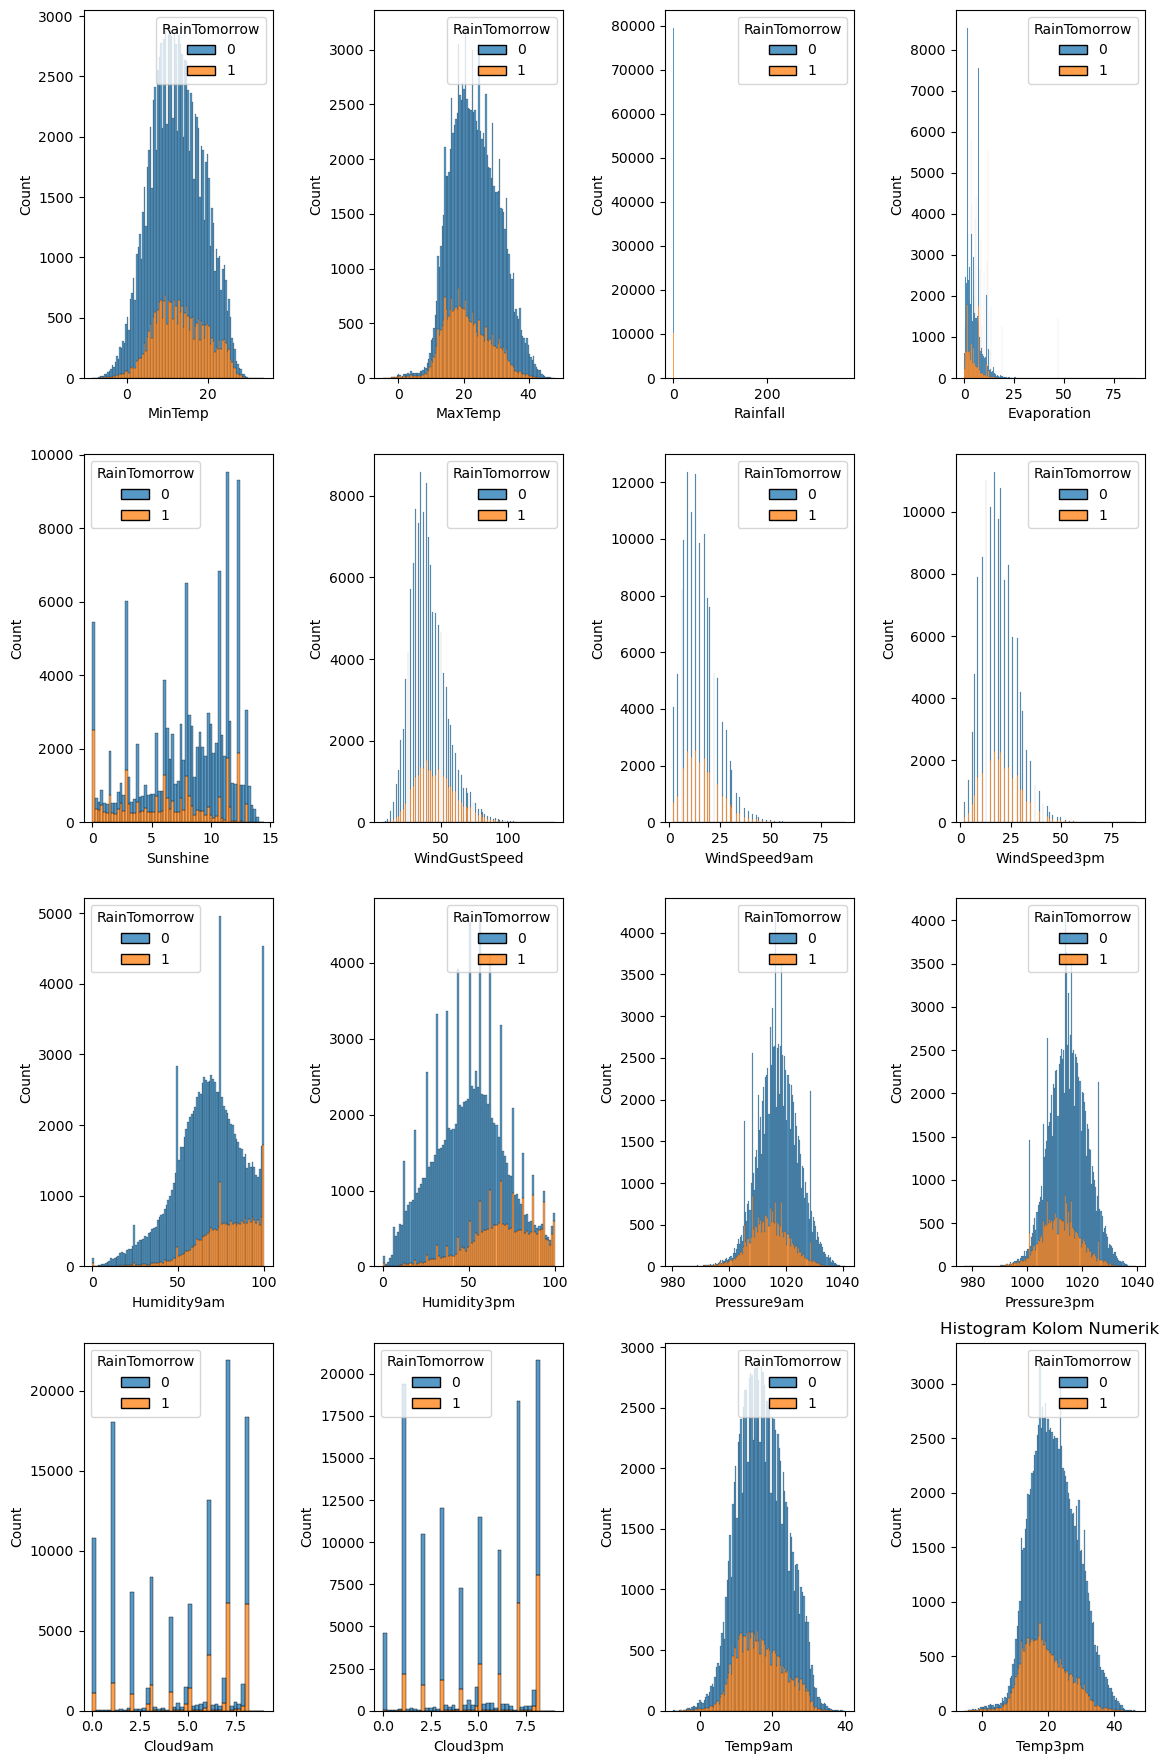

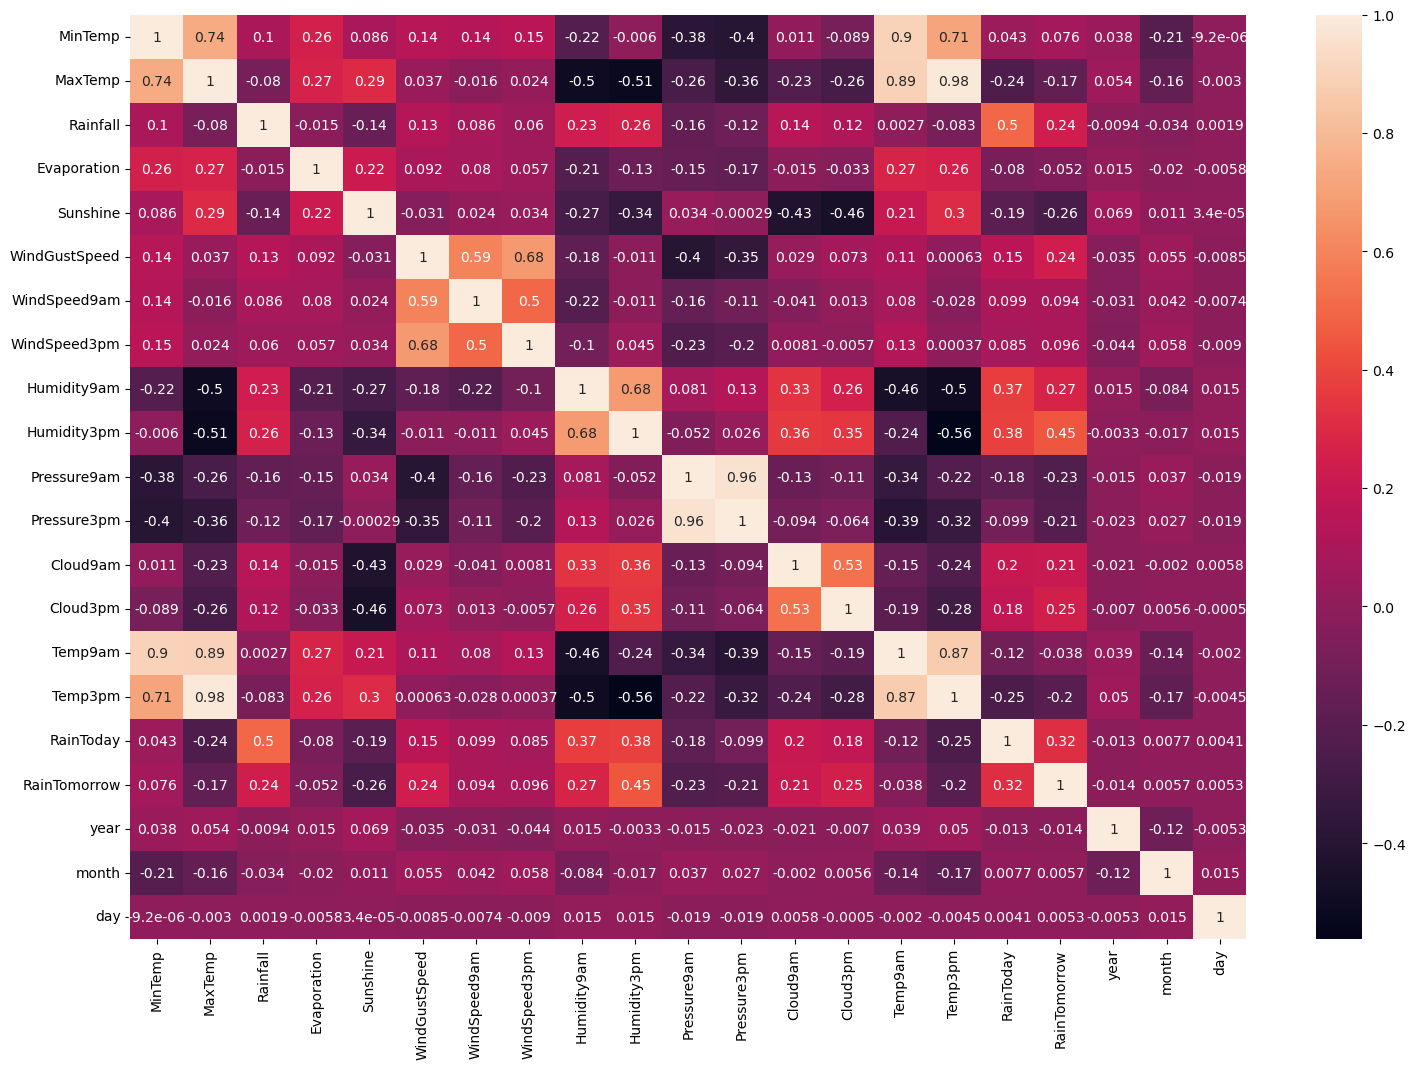

In [35]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation=90)
plt.show()

Berdasarkan heatmap di atas, dapat dilihat bahwa kolom `Humidity3pm` dan `RainToday` terhadap `RainTomorrow`memiliki nilai koefisien korelasi paling tinggi. Ini mendukung asumsi sebelumnya, bahwa semakin tinggi tingkat humiditas, maka semakin tinggi juga kemungkinan untuk hujan di esok hari, serta hujan di hari kemarin juga membawa kemungkinan untuk hujan di esok hari.

# Data Preprocessing

Proses ini dilakukan untuk penyiapan data untuk proses pelatihan model prediksi klasifikasi.

## Menghilangkan kolom numerik yang memiliki nilai koefisien korelasi rendah terhadap kolom target

Berdasarkan heatmap di atas, diketahui bahwa kolom-kolom yang memiliki nilai koefisien korelasi rendah terhadap kolom target atau `RainTomorrow` adalah `MinTemp`, `Evaporation`, `WindSpeed9am`, `WindSpeed3pm`, dan `Temp9am`.

In [36]:
df.drop(['MinTemp','Evaporation','WindSpeed9am','WindSpeed3pm','Temp9am'], axis=1, inplace=True)

## Menghilangkan kolom kategorik yang diduga tidak berpengaruh signifikan terhadap kolom target

Berdasarkan analisis eksplorasi data sebelumnya, diasumsikan bahwa ketiga kolom kategorik yaitu `WindGustDir`, `WindDir9am`, dan `WindDir3pm` tidak memiliki pengaruh yang signifikan. Maka dari itu, untuk mendukung asumsi ini akan dibuat heatmap untuk melihat bagaimana koefisien korelasi antara kolom kategorik ini dengan kolom `RainTomorrow`.

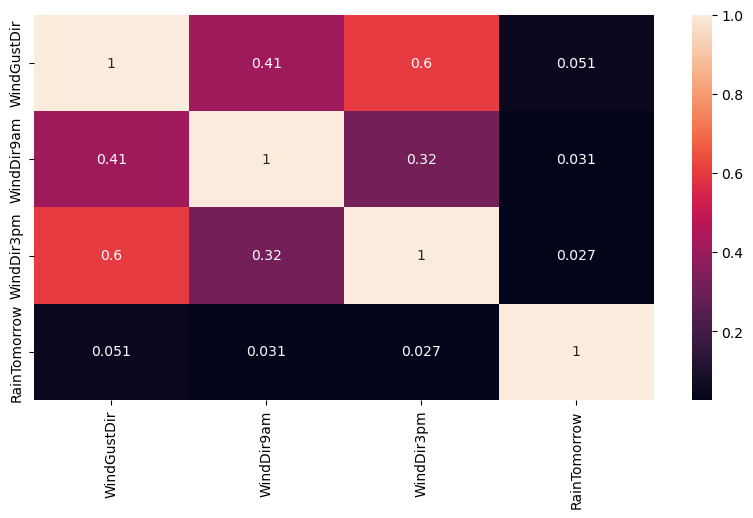

In [37]:
# Mengubah kolom kategorik menjadi kolom numerik
dff = df.copy()
cat = ['WindGustDir','WindDir9am','WindDir3pm','RainTomorrow']
le =  LabelEncoder()
for i in cat:
        dff[i] = le.fit_transform(dff[i])

dff = dff[['WindGustDir','WindDir9am','WindDir3pm','RainTomorrow']]

plt.figure(figsize=(10,5))
sns.heatmap(dff.corr(), annot=True)
plt.xticks(rotation=90)
plt.show()

Berdasarkan plot di atas, diketahui bahwa ketiga kolom kategorik ini memiliki nilai koefisien korelasi yang rendah terhadap kolom `RainTomorrow`, maka ketiga kolom ini tidak memiliki pengaruh yang signifikan, sehingga akan didrop atau dihilangkan dari dataset.

In [38]:
df.drop(['WindGustDir','WindDir9am','WindDir3pm'], axis=1, inplace=True)

## Menghilangkan kolom yang memiliki nilai koefisien korelasi tinggi satu sama lain (multikolinearitas)

Asumsi multikolinearitas cukup menjadi perhatian dalam prediksi ini, karena adanya multikolinearitas akan berdampak pada perubahan pada satu variabel dapat menyebabkan perubahan besar pada nilai koefisien regresi parsial variabel lainnya.

*https://www.statistikian.com/*

Dapat dilihat pada heatmap sebelumnya bahwa kolom `MaxTemp` dengan `Temp3pm`, dan juga kolom `Pressure9am` dan `Pressure3pm` memiliki korelasi yang sangat tinggi yaitu 0.98 dan 0.96. Maka dari itu salah satu dari kedua kolom akan didrop atau dihilangkan. 

In [39]:
df.drop(['Temp3pm','Pressure3pm'], axis=1, inplace=True)

In [40]:
# Drop kolom date, year, day karena tidak dibutuhkan
df.drop(['Date','year','day'], axis=1, inplace=True)

In [41]:
# Memeriksa kembali ringkasan dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123710 entries, 0 to 145458
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       123710 non-null  object 
 1   MaxTemp        123710 non-null  float64
 2   Rainfall       123710 non-null  float64
 3   Sunshine       123710 non-null  float64
 4   WindGustSpeed  123710 non-null  float64
 5   Humidity9am    123710 non-null  float64
 6   Humidity3pm    123710 non-null  float64
 7   Pressure9am    123710 non-null  float64
 8   Cloud9am       123710 non-null  float64
 9   Cloud3pm       123710 non-null  float64
 10  RainToday      123710 non-null  int64  
 11  RainTomorrow   123710 non-null  int64  
 12  month          123710 non-null  int64  
dtypes: float64(9), int64(3), object(1)
memory usage: 17.2+ MB


In [42]:
# Reset index setelah dilakukan dropping dengan tujuan agar index berurutan
df.reset_index(drop=True, inplace=True)

## Standarisasi data

Standardisasi adalah proses mengubah data sedemikian rupa sehingga mean tiap variabel menjadi sama dengan nol, dan standard deviation tiap variabel adalah satu. Dengan begitu, akan didapatkan skala yang sama untuk semua variabel. Standarisasi juga dilakukan karena terdapat *outlier* atau pecilan pada data.

In [43]:
columns = ['MaxTemp', 'Rainfall', 'Sunshine', 'WindGustSpeed',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Cloud9am', 'Cloud3pm',
       'month', 'RainToday', 'RainTomorrow','Location']

In [44]:
data = df[columns]

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123710 entries, 0 to 123709
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MaxTemp        123710 non-null  float64
 1   Rainfall       123710 non-null  float64
 2   Sunshine       123710 non-null  float64
 3   WindGustSpeed  123710 non-null  float64
 4   Humidity9am    123710 non-null  float64
 5   Humidity3pm    123710 non-null  float64
 6   Pressure9am    123710 non-null  float64
 7   Cloud9am       123710 non-null  float64
 8   Cloud3pm       123710 non-null  float64
 9   month          123710 non-null  int64  
 10  RainToday      123710 non-null  int64  
 11  RainTomorrow   123710 non-null  int64  
 12  Location       123710 non-null  object 
dtypes: float64(9), int64(3), object(1)
memory usage: 12.3+ MB


In [45]:
scaler = StandardScaler()
scaler.fit(data.drop(['RainToday','RainTomorrow','Location'], axis=1))
scaled_features = scaler.transform(data.drop(['RainToday','RainTomorrow','Location'], axis=1))
df_feat = pd.DataFrame(scaled_features,columns = data.columns[:-3])
df_feat.head()

,MaxTemp,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,month
0,-0.080072,-0.208215,1.158263,0.247578,0.174326,-1.371087,-1.348214,1.223289,-0.976717,1.602307
1,0.225134,-0.278572,1.158263,0.247578,-1.234497,-1.228100,-0.937933,1.044012,0.162017,1.602307
2,0.308373,-0.278572,1.158263,0.396959,-1.547568,-0.989788,-1.362361,1.044012,-0.976717,1.602307
3,0.627452,-0.278572,1.158263,-1.246232,-1.182318,-1.657062,0.052400,0.267144,0.162017,1.602307
4,1.223992,-0.161311,1.158263,0.023507,0.748291,-0.846800,-0.909638,0.864734,1.300751,1.602307


In [46]:
# Menambahkan kolom Location dan RainToday
df_feat['Location'] = data['Location']
df_feat['RainToday'] = data['RainToday']

df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123710 entries, 0 to 123709
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MaxTemp        123710 non-null  float64
 1   Rainfall       123710 non-null  float64
 2   Sunshine       123710 non-null  float64
 3   WindGustSpeed  123710 non-null  float64
 4   Humidity9am    123710 non-null  float64
 5   Humidity3pm    123710 non-null  float64
 6   Pressure9am    123710 non-null  float64
 7   Cloud9am       123710 non-null  float64
 8   Cloud3pm       123710 non-null  float64
 9   month          123710 non-null  float64
 10  Location       123710 non-null  object 
 11  RainToday      123710 non-null  int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 11.3+ MB


## Encoder untuk kolom `Location`

In [47]:
df_dummies = pd.get_dummies(df_feat, columns=['Location'])
df_dummies.head()

,MaxTemp,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,month,RainToday,Location_Adelaide,Location_Albury,...,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
0,-0.080072,-0.208215,1.158263,0.247578,0.174326,-1.371087,-1.348214,1.223289,-0.976717,1.602307,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.225134,-0.278572,1.158263,0.247578,-1.234497,-1.228100,-0.937933,1.044012,0.162017,1.602307,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.308373,-0.278572,1.158263,0.396959,-1.547568,-0.989788,-1.362361,1.044012,-0.976717,1.602307,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.627452,-0.278572,1.158263,-1.246232,-1.182318,-1.657062,0.052400,0.267144,0.162017,1.602307,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.223992,-0.161311,1.158263,0.023507,0.748291,-0.846800,-0.909638,0.864734,1.300751,1.602307,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
df_final = df_dummies.copy()

## Splitting dataset

Membagi data training dan testing dengan rasio 70:30

In [49]:
X = df_final
y = df.RainTomorrow

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [51]:
print("Training set sebesar {0:0.2f}%".format(len(X_train)/len(df.index)*100))
print("Test set sebesar {0:0.2f}%".format(len(X_test)/len(df.index)*100))

Training set sebesar 70.00%
Test set sebesar 30.00%


In [52]:
print('Jumlah training set:', len(X_train))
print('Jumlah testing set:', len(X_test))

Jumlah training set: 86597
Jumlah testing set: 37113


In [53]:
print("Jumlah hari turunnya hujan: {0} ({1:2.2f}%)".format(len(df.loc[df["RainTomorrow"] == 1]), (len(df.loc[df["RainTomorrow"]==1])/len(df.index))*100.0))
print("Jumlah hari turunnya hujan : {0} ({1:2.2f}%)\n".format(len(df.loc[df["RainTomorrow"] == 0]), (len(df.loc[df["RainTomorrow"] == 0])/len(df.index))*100.0))

print("Training True: {0} ({1:2.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)*100.0)))
print("Training False: {0} ({1:2.2f}%)\n".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)*100.0)))

print("Testing True: {0} ({1:2.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)*100.0)))
print("Testing False: {0} ({1:2.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)*100.0)))

Jumlah hari turunnya hujan: 27392 (22.14%)
Jumlah hari turunnya hujan : 96318 (77.86%)

Training True: 19095 (22.05%)
Training False: 67502 (77.95%)

Testing True: 8297 (22.36%)
Testing False: 28816 (77.64%)


# Pendefinisian Model

## Logistic Regression

In [54]:
logreg = LogisticRegression(C=0.7, class_weight='balanced', solver='liblinear', random_state=0)

## SVM

In [55]:
svm = svm.SVC(class_weight='balanced', kernel='linear')

# Pelatihan Model

## Logistic Regression

In [56]:
logreg.fit(X_train, y_train)

LogisticRegression(C=0.7, class_weight='balanced', random_state=0,
                   solver='liblinear')

In [57]:
y_pred_lr = logreg.predict(X_test)

## SVM

In [58]:
svm.fit(X_train, y_train)

SVC(class_weight='balanced', kernel='linear')

In [59]:
y_pred_svm = svm.predict(X_test)

# Evaluasi Model

## Logistic Regression

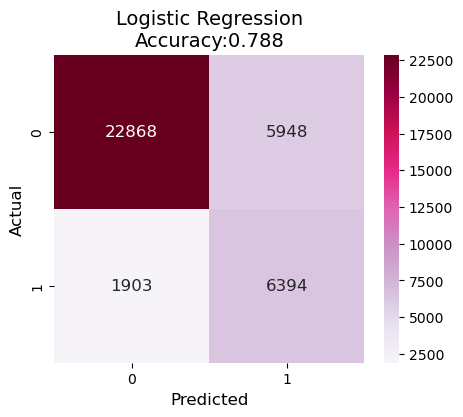

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85     28816
           1       0.52      0.77      0.62      8297

    accuracy                           0.79     37113
   macro avg       0.72      0.78      0.74     37113
weighted avg       0.83      0.79      0.80     37113

Accuracy Score:- 0.7884568749494786
Precision Score:- 0.5180683843785449
Recall Score:- 0.7706399903579607
F1 Score: 0.619603662968167


In [60]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Logistic Regression\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_lr)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

print(f'Accuracy Score:- {accuracy_score(y_test, y_pred_lr)}')
print(f'Precision Score:- {precision_score(y_test,y_pred_lr)}')
print(f'Recall Score:- {recall_score(y_test,y_pred_lr)}')
print("F1 Score:",f1_score(y_test,y_pred_lr))

## SVM

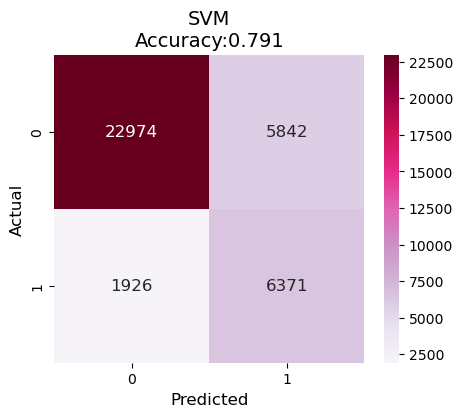

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.80      0.86     28816
           1       0.52      0.77      0.62      8297

    accuracy                           0.79     37113
   macro avg       0.72      0.78      0.74     37113
weighted avg       0.83      0.79      0.80     37113

Accuracy Score:- 0.7906932880661762
Precision Score:- 0.5216572504708098
Recall Score:- 0.767867904061709
F1 Score: 0.6212579229644076


In [61]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("SVM\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_svm)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

print(f'Accuracy Score:- {accuracy_score(y_test, y_pred_svm)}')
print(f'Precision Score:- {precision_score(y_test,y_pred_svm)}')
print(f'Recall Score:- {recall_score(y_test,y_pred_svm)}')
print("F1 Score:",f1_score(y_test,y_pred_svm))

Dari model yang telah dibuat, dapat dilihat bahwa model LogisticRegression memiliki performa prediksi lebih baik dibanding SVM. Walaupun SVM memiliki tingkat akurasi lebih tinggi, tetapi tingkat performa klasifikasi cenderung sama. Oleh karena itu, LogisticRegression digunakan untuk memprediksi label/target pada dataset ini, di mana model LogisticRegression memiliki nilai akurasi sebesar 0.79, precision score sebesar 0.52, recall Score sebesar 0.77 dan F1 Score sebesar 0.62.

# Feature Importance

Setelah mendapatkan model prediksi klasifikasi terbaik, akan dicek *feature importance* dari data, yaitu mengetahui fitur/kolom mana saja yang paling berpengaruh untuk menentukan prediksi target.

Sebelum mengecek *feature importances* dari model, akan dilihat koefisien regresi logistik dan juga intersep dari model yang didapat.

In [62]:
print('Nilai Intersep model:', logreg.intercept_)
print('')
print('Nilai koefisien model regresi logistik:', logreg.coef_)

Nilai Intersep model: [-0.6676685]

Nilai koefisien model regresi logistik: [[ 0.24023411  0.08167103 -0.43517354  0.63028628  0.13601251  1.24887592
  -0.33585174 -0.00817539  0.22432896  0.06934389  0.31850616  0.75332022
   0.94031663  0.19572559  0.53703353  0.06863527  0.66552294  0.49666852
  -0.19684361 -0.23217783  0.37478694 -0.10808341  0.02172862 -0.3149804
  -0.07491963 -0.33683635  0.30366345 -0.01963864 -0.17958912 -0.4626328
   0.03446388  0.16549841 -0.04789106 -1.38699117 -0.34127093  0.29204711
  -0.30084809  0.03024459 -0.01394225  0.16880851  0.53063657  0.29665551
  -0.17955753 -0.88910856 -0.49947777  0.73817987  0.03481828 -0.1696989
  -0.95524767 -0.41127483  0.48319151  0.35503937 -0.19074652 -0.03852661
   0.04072094  0.43285595 -0.91930385 -0.35864318]]


In [63]:
# Memeriksa feature importance

feature_importance=pd.DataFrame({'feature':list(df_final.columns),'feature_importance':[abs(i) for i in logreg.coef_[0]]})
feature_importance

,feature,feature_importance
0,MaxTemp,0.240234
1,Rainfall,0.081671
2,Sunshine,0.435174
3,WindGustSpeed,0.630286
4,Humidity9am,0.136013
5,Humidity3pm,1.248876
6,Pressure9am,0.335852
7,Cloud9am,0.008175
8,Cloud3pm,0.224329
9,month,0.069344


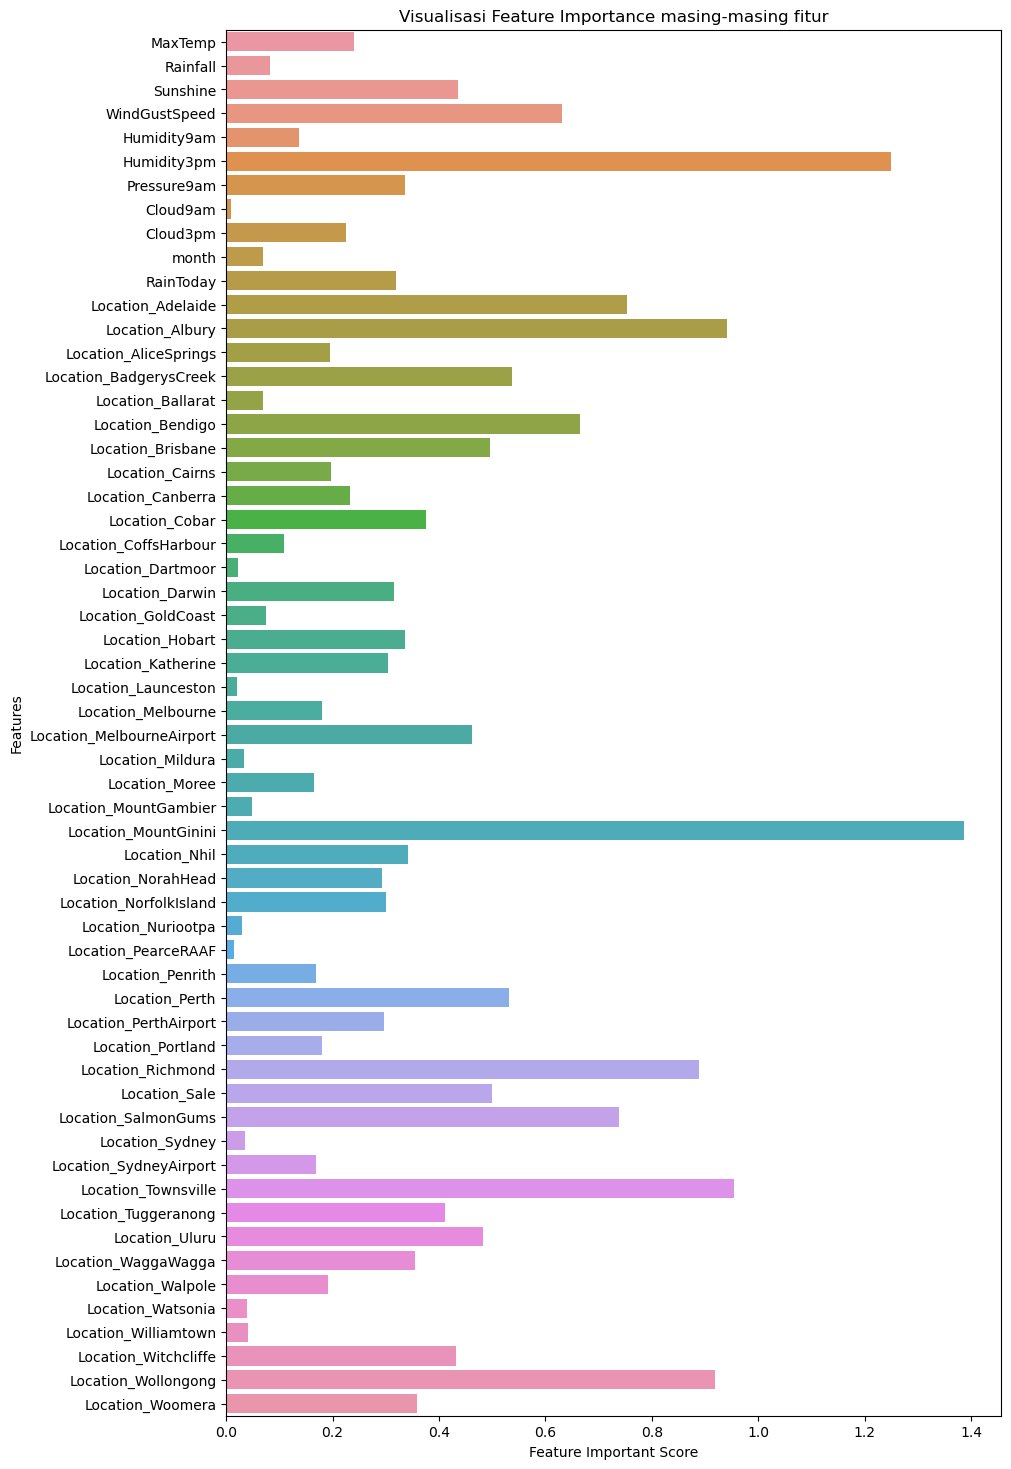

In [64]:
plt.figure(figsize=(10, 18))
sns.barplot(x=feature_importance['feature_importance'], y=feature_importance['feature'])
plt.xlabel("Feature Important Score")
plt.ylabel("Features")
plt.title("Visualisasi Feature Importance masing-masing fitur")

plt.show()

Berdasarkan skor *feature importance* di bawah ini, kolom `Cloud9am` memiliki skor yang paling kecil sehingga kolom ini akan didrop atau dihilangkan dan akan dibuat model LogisticRegression baru.

# Membangun model Logistic Regression baru

In [65]:
data2 = data.copy()
data2.drop('Cloud9am', axis=1, inplace=True)
feature_names = list(data2.columns.values)

data2.head()

,MaxTemp,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Cloud3pm,month,RainToday,RainTomorrow,Location
0,22.9,0.6,12.3,44.0,71.0,22.0,1007.7,2.0,12,0,0,Albury
1,25.1,0.0,12.3,44.0,44.0,25.0,1010.6,5.0,12,0,0,Albury
2,25.7,0.0,12.3,46.0,38.0,30.0,1007.6,2.0,12,0,0,Albury
3,28.0,0.0,12.3,24.0,45.0,16.0,1017.6,5.0,12,0,0,Albury
4,32.3,1.0,12.3,41.0,82.0,33.0,1010.8,8.0,12,0,0,Albury


In [66]:
scaler_ = StandardScaler()
scaler_.fit(data2.drop(['RainToday','RainTomorrow','Location'], axis=1))
scaled_features_ = scaler_.transform(data2.drop(['RainToday','RainTomorrow','Location'], axis=1))
df_feat_ = pd.DataFrame(scaled_features_,columns = data2.columns[:-3])
df_feat_.head()

,MaxTemp,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Cloud3pm,month
0,-0.080072,-0.208215,1.158263,0.247578,0.174326,-1.371087,-1.348214,-0.976717,1.602307
1,0.225134,-0.278572,1.158263,0.247578,-1.234497,-1.228100,-0.937933,0.162017,1.602307
2,0.308373,-0.278572,1.158263,0.396959,-1.547568,-0.989788,-1.362361,-0.976717,1.602307
3,0.627452,-0.278572,1.158263,-1.246232,-1.182318,-1.657062,0.052400,0.162017,1.602307
4,1.223992,-0.161311,1.158263,0.023507,0.748291,-0.846800,-0.909638,1.300751,1.602307


In [67]:
df_feat_['Location'] = data2['Location']
df_feat_['RainToday'] = data2['RainToday']

df_feat_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123710 entries, 0 to 123709
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MaxTemp        123710 non-null  float64
 1   Rainfall       123710 non-null  float64
 2   Sunshine       123710 non-null  float64
 3   WindGustSpeed  123710 non-null  float64
 4   Humidity9am    123710 non-null  float64
 5   Humidity3pm    123710 non-null  float64
 6   Pressure9am    123710 non-null  float64
 7   Cloud3pm       123710 non-null  float64
 8   month          123710 non-null  float64
 9   Location       123710 non-null  object 
 10  RainToday      123710 non-null  int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 10.4+ MB


In [68]:
df_dummies_ = pd.get_dummies(df_feat_, columns=['Location'])
df_dummies_.head()

,MaxTemp,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Cloud3pm,month,RainToday,Location_Adelaide,Location_Albury,Location_AliceSprings,...,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
0,-0.080072,-0.208215,1.158263,0.247578,0.174326,-1.371087,-1.348214,-0.976717,1.602307,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.225134,-0.278572,1.158263,0.247578,-1.234497,-1.228100,-0.937933,0.162017,1.602307,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.308373,-0.278572,1.158263,0.396959,-1.547568,-0.989788,-1.362361,-0.976717,1.602307,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.627452,-0.278572,1.158263,-1.246232,-1.182318,-1.657062,0.052400,0.162017,1.602307,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.223992,-0.161311,1.158263,0.023507,0.748291,-0.846800,-0.909638,1.300751,1.602307,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0


In [69]:
df_final_ = df_dummies_.copy()

In [70]:
X = df_final_
y = df.RainTomorrow

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [72]:
logreg = LogisticRegression(C=0.6, class_weight='balanced', solver='liblinear', random_state=0)

In [73]:
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

In [74]:
# Memeriksa hasil probabilitas
logreg.predict_proba(X_test)

array([[0.79781674, 0.20218326],
       [0.92539227, 0.07460773],
       [0.84468925, 0.15531075],
       ...,
       [0.70623339, 0.29376661],
       [0.62131875, 0.37868125],
       [0.01546461, 0.98453539]])

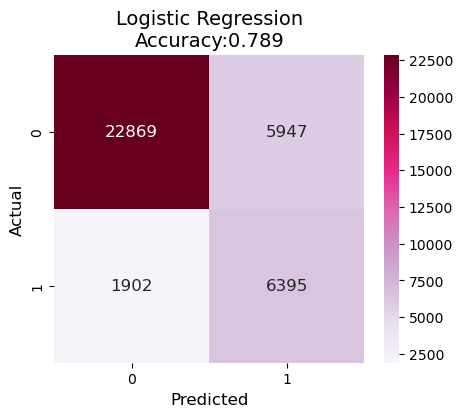

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85     28816
           1       0.52      0.77      0.62      8297

    accuracy                           0.79     37113
   macro avg       0.72      0.78      0.74     37113
weighted avg       0.83      0.79      0.80     37113

Accuracy Score:- 0.7885107644221702
Precision Score:- 0.51814940852374
Recall Score:- 0.7707605158491021
F1 Score: 0.6197005668879306


In [75]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Logistic Regression\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_lr)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

print(f'Accuracy Score:- {accuracy_score(y_test, y_pred_lr)}')
print(f'Precision Score:- {precision_score(y_test,y_pred_lr)}')
print(f'Recall Score:- {recall_score(y_test,y_pred_lr)}')
print("F1 Score:",f1_score(y_test,y_pred_lr))

Berdasarkan output di atas, didapat bahwa algoritma terbaik adalah LogisticRegression dan setelah dilakukan pengecekan feature importance dengan mengurangi jumlah kolom didapat nilai akurasi akhir sebesar 79%, nilai precision sebesar 0.52, recall sebesa 0.77, dan f1-score sebesar 0.62. Pengurangan jumlah kolom tidak mempengaruhi performa klasifikasi secara signifikan.

# Model Inference

Untuk menguji keakuratan model, dilakukan *model inference* untuk menguji model dengan data di luar data yang tersedia.

Suatu hari bulan Februari di Perth, Australia tercatat laporan kondisi cuaca pada hari itu yang dilampirkan sebagai berikut:

1. Temperatur maksimal: 28 derajat celcius.
2. Jumlah curah hujan: 0.0 mm
3. Jumlah jam hari itu cerah dengan cahaya matahari: 11.9 jam
4. Kecepatan angin: 45.0
5. Jumlah Humiditas pada pukul 9 pagi: 60.0%
6. Jumlah Humiditas pada pukul 3 sore: 30.0%
7. Tekanan Udara pada pukul 9 pagi: 1020.0 hpa
8. Persentase langit tertutup awan: 3.5%

Hari ini tidak turun hujan, apakah berdasarkan kondisi cuaca hari ini akan turun hujan keesokan harinya?

In [76]:
maxtemp = float(input("Max Temperature:"))
rainfall = float(input("Rainfall (in mm):"))
sunshine = float(input("Sunshine hour:"))
windspeed = float(input("Wind Speed:"))
humidity9 = float(input("Humidity percentation at 9 AM:"))
humidity3 = float(input("Humidity percentation at 3 PM:"))
pressure = float(input("Pressure at 9 AM:"))
cloud = float(input("Cloud persentation at 3 PM:"))
month = int(input('Month:'))
raintoday = int(input('Is today raining? Please type 1 for YES and 0 for NO '))
location = input('Your Location:')

val = [maxtemp, rainfall, sunshine, windspeed, humidity9, humidity3, pressure, cloud, month]
val = scaler_.transform([val])
val = val.reshape(9,)

if raintoday == 1:
    val = np.append(val, 1)
elif raintoday == 0:
    val = np.append(val, 0)
else:
    print('ERROR!')

locations = {"Adelaide":0,"Albury":1,"AliceSprings":2,
            "Badgerys Creek":3,"Ballarat":4,"Bendigo":5,
            "Brisbane":6,"Cairns":7,"Canberra":8,
            "Cobar":9,"Coffs Harbour":10,"Dartmoor":11,
            "Darwin":12,"Gold Coast":13,"Hobart":14,
            "Katherine":15,"Launceston":16,"Melbourne":17,
            "Melbourne Airport":18,"Mildura":19,"Moree":20,
            "Mount Gambier":21,"Mount Ginini":22,"Nhil":23,
            "Norah Head":24,"Norfolk Island":25,"Nuriootpa":26,
            "Pearce RAAF":27,"Penrith":28,"Perth":29,
            "Perth Airport":30,"Portland":31,"Richmond":32,
            "Sale":33, "Salmon Gums":34, "Sydney":35,
            "Sydney Airport":36, "Townsville":37, "Tuggeranong":38,
            "Uluru":39, "Wagga Wagga":40, "Walpole":41, 
            "Watsonia":42, "Williamtown":43, "Witchcliffe":44,
            "Wollongong":45, "Woomera":46}

for i in range(0,47):
    if locations[location]==i:
        val = np.append(val, 1)
    else:
        val = np.append(val, 0)

print(val)

val_predict = logreg.predict([val])

if val_predict == 1:
    print('Prediksi bernilai 1, maka akan diprediksi besok turun hujan')
elif val_predict == 0:
    print('Prediksi bernilai 0, maka akan diprediksi besok TIDAK turun hujan')
else:
    print('Prediksi tidak valid')

Max Temperature:22
Rainfall (in mm):0.6
Sunshine hour:10
Wind Speed:54
Humidity percentation at 9 AM:19
Humidity percentation at 3 PM:45
Pressure at 9 AM:1000
Cloud persentation at 3 PM:10
Month:7
Is today raining? Please type 1 for YES and 0 for NO 1
Your Location:Sale
[-0.20492924 -0.20821527  0.5481836   0.99448324 -2.538962   -0.27485153
 -2.43757984  2.05990747  0.16349911  1.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          1.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]
Prediksi bernilai 1, maka akan diprediksi besok turun hujan


Suatu hari bulan Juli di Sydney, Australia tercatat laporan kondisi cuaca pada hari itu yang dilampirkan sebagai berikut:

1. Temperatur maksimal: 22 derajat celcius.
2. Jumlah curah hujan: 0.6 mm
3. Jumlah jam hari itu cerah dengan cahaya matahari: 10 jam
4. Kecepatan angin: 54.0
5. Jumlah Humiditas pada pukul 9 pagi: 19.0%
6. Jumlah Humiditas pada pukul 3 sore: 45.0%
7. Tekanan Udara pada pukul 9 pagi: 1000.0 hpa
8. Persentase langit tertutup awan: 10%

Hari ini turun hujan, apakah berdasarkan kondisi cuaca hari ini akan turun hujan keesokan harinya?

In [77]:
maxtemp = float(input("Max Temperature:"))
rainfall = float(input("Rainfall (in mm):"))
sunshine = float(input("Sunshine hour:"))
windspeed = float(input("Wind Speed:"))
humidity9 = float(input("Humidity percentation at 9 AM:"))
humidity3 = float(input("Humidity percentation at 3 PM:"))
pressure = float(input("Pressure at 9 AM:"))
cloud = float(input("Cloud persentation at 3 PM:"))
month = int(input('Month:'))
raintoday = int(input('Is today raining? Please type 1 for YES and 0 for NO '))
location = input('Your Location:')

val = [maxtemp, rainfall, sunshine, windspeed, humidity9, humidity3, pressure, cloud, month]
val = scaler_.transform([val])
val = val.reshape(9,)

if raintoday == 1:
    val = np.append(val, 1)
elif raintoday == 0:
    val = np.append(val, 0)
else:
    print('ERROR!')

locations = {"Adelaide":0,"Albury":1,"AliceSprings":2,
            "Badgerys Creek":3,"Ballarat":4,"Bendigo":5,
            "Brisbane":6,"Cairns":7,"Canberra":8,
            "Cobar":9,"Coffs Harbour":10,"Dartmoor":11,
            "Darwin":12,"Gold Coast":13,"Hobart":14,
            "Katherine":15,"Launceston":16,"Melbourne":17,
            "Melbourne Airport":18,"Mildura":19,"Moree":20,
            "Mount Gambier":21,"Mount Ginini":22,"Nhil":23,
            "Norah Head":24,"Norfolk Island":25,"Nuriootpa":26,
            "Pearce RAAF":27,"Penrith":28,"Perth":29,
            "Perth Airport":30,"Portland":31,"Richmond":32,
            "Sale":33, "Salmon Gums":34, "Sydney":35,
            "Sydney Airport":36, "Townsville":37, "Tuggeranong":38,
            "Uluru":39, "Wagga Wagga":40, "Walpole":41, 
            "Watsonia":42, "Williamtown":43, "Witchcliffe":44,
            "Wollongong":45, "Woomera":46}

for i in range(0,47):
    if locations[location]==i:
        val = np.append(val, 1)
    else:
        val = np.append(val, 0)

print(val)

val_predict = logreg.predict([val])

if val_predict == 1:
    print('Prediksi bernilai 1, maka akan diprediksi besok turun hujan')
elif val_predict == 0:
    print('Prediksi bernilai 0, maka akan diprediksi besok TIDAK turun hujan')
else:
    print('Prediksi tidak valid')

Max Temperature:22
Rainfall (in mm):0.6
Sunshine hour:10
Wind Speed:54
Humidity percentation at 9 AM:19
Humidity percentation at 3 PM:45
Pressure at 9 AM:1000
Cloud persentation at 3 PM:10
Month:7
Is today raining? Please type 1 for YES and 0 for NO 0
Your Location:Sale
[-0.20492924 -0.20821527  0.5481836   0.99448324 -2.538962   -0.27485153
 -2.43757984  2.05990747  0.16349911  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          1.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]
Prediksi bernilai 0, maka akan diprediksi besok TIDAK turun hujan


# Conclusion

Berdasarkan keseluruhan hasil analisis di atas, dapat disimpulkan bahwa:
1. Project ini membahas tentang penerapan Supervised Machine Learning, yaitu metode Classification. Algoritma model klasifikasi yang digunakan adalah Logistic Regression dan Support Vector Machine (SVM). Tujuan dari project ini adalah mengevaluasi dan menerapkan konsep Logistic Regression dan SVM untuk metode klasifikasi pada Machine Learning. Data yang digunakan dalam project ini adalah dataset yang berisi dokumentasi kondisi cuaca dan apakah hari itu turun hujan atau tidak di beberapa daerah di Australia selama 10 tahun. Kolom `RainTomorrow` akan menjadi target untuk prediksi ini. Jadi, objektif dari project ini adalah berdasarkan observasi atau dokumentasi kondisi cuaca pada hari itu, apakah besoknya akan turun hujan (Yes) atau tidak (No).
2. Diketahui bahwa kolom atau fitur yang paling mempengaruhi kolom target adalah `Humidity3pm`. Artinya jumlah humiditas dalam persentase pada jam 3 sore memberikan pengaruh paling signifikan dalam menentukan turunnya hujan di keesokan harinya. Semakin tinggi jumlah humiditas, maka kemungkinan hujan akan semakin besar.
3. Lokasi Adelaide adalah lokasi yang memiliki intensitas hujan tertinggi.
4. Bulan Juni-Juli adalah bulan yang memiliki intensitas hujan tertinggi. Sedangkan bulan Januari-Februari memiliki intensitas hujan terendah.
3. Algoritma model klasifikasi yang digunakan adalah Logistic Regression dan Support Vector Machine (SVM).  Walaupun model SVM juga memiliki performa yang baik dan tidak terdapat perbedaan tingkat klasifikasi dengan LogisticRegression, SVM cenderung memakan waktu lebih lama dalam proses pelatihan model. Sehingga berdasarkan pelatihan model yang sudah dilakukan, algoritma yang dipilih adalah LogisticRegression dan didapat nilai akurasi akhir sebesar 79%, nilai precision sebesar 0.52, recall sebesar 0.77, dan f1-score sebesar 0.62.

# Save Model

In [78]:
pickle_file_dir = open("logreg.pkl", "wb")

pickle.dump(logreg, pickle_file_dir)
pickle_file_dir.close()

In [79]:
pickle_file_dir = open("regresi.pkl", "wb")

pickle.dump(scaler_, pickle_file_dir)
pickle_file_dir.close()